In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warnings
warnings.filterwarnings('ignore')

In [3]:
datapath="./DataSet/email_phishing_data.csv"
df=pd.read_csv(datapath)
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [5]:
df.shape

(524846, 9)

In [6]:
df.isnull().sum()

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

In [7]:
x=df.select_dtypes(include=['int64','float64']).columns.to_list()
print(x)

['num_words', 'num_unique_words', 'num_stopwords', 'num_links', 'num_unique_domains', 'num_email_addresses', 'num_spelling_errors', 'num_urgent_keywords', 'label']


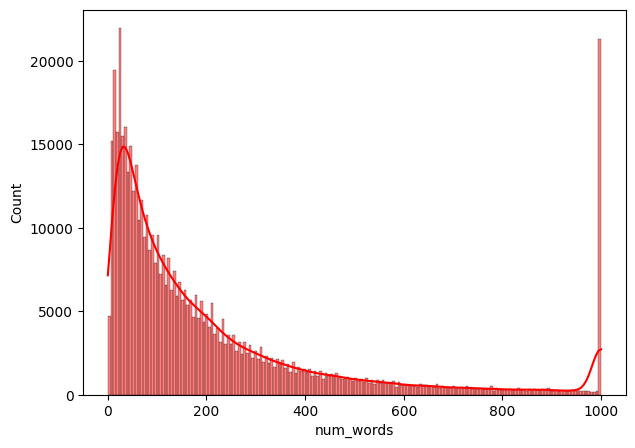

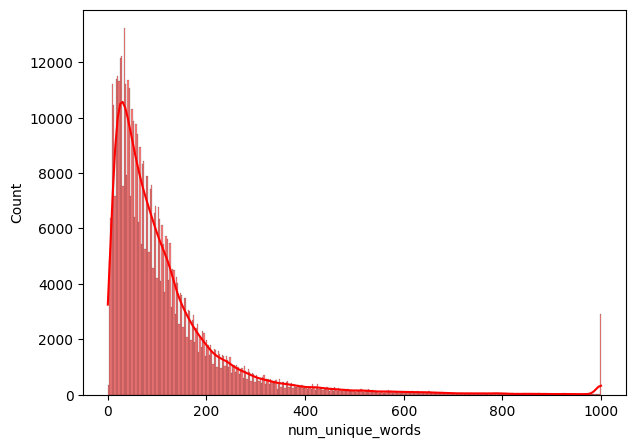

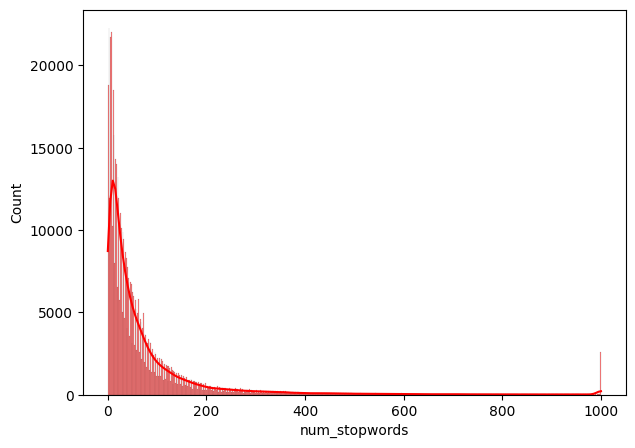

In [8]:
y=['num_words','num_unique_words','num_stopwords']
for i in y:
    plt.figure(figsize=(7,5))
    df_cap=df[i].clip(upper=1000)
    sns.histplot(df_cap,kde=True,color='red')



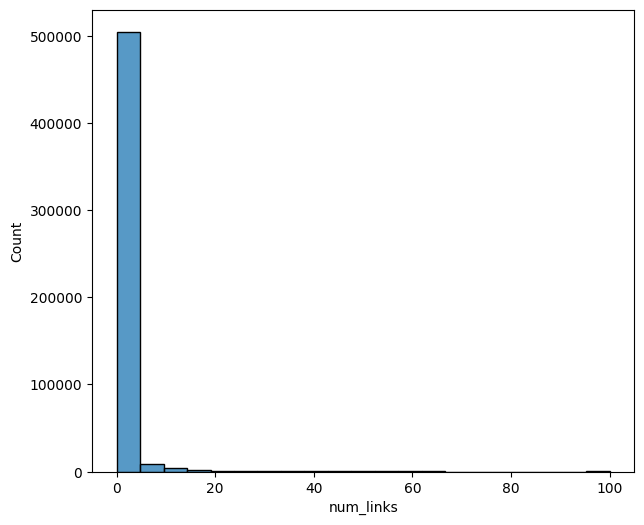

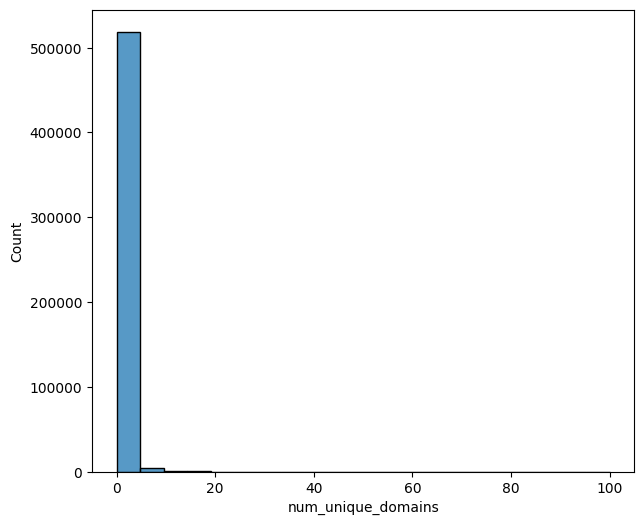

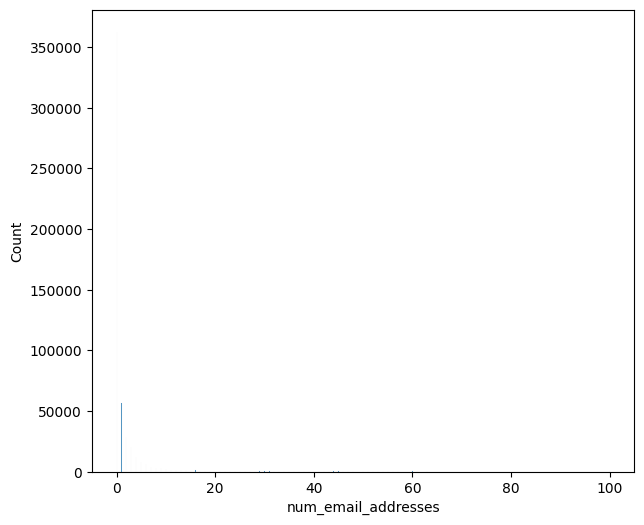

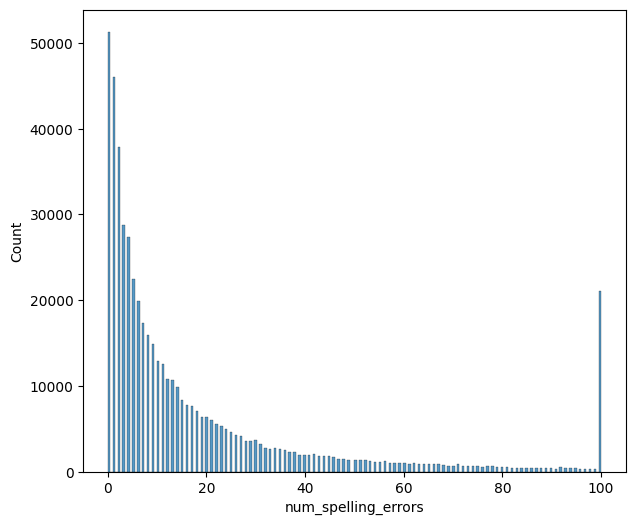

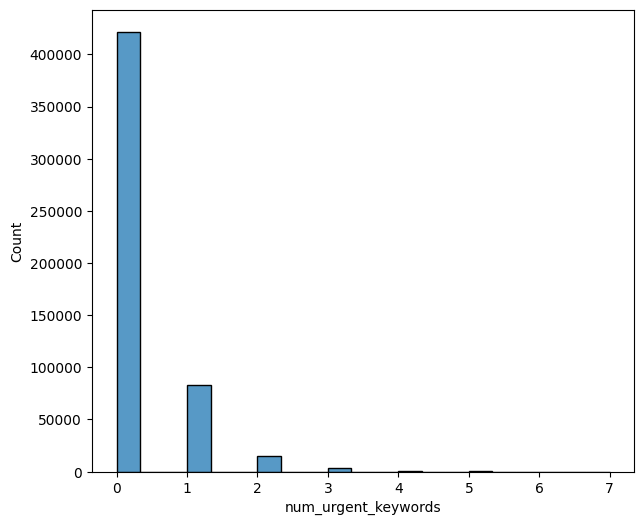

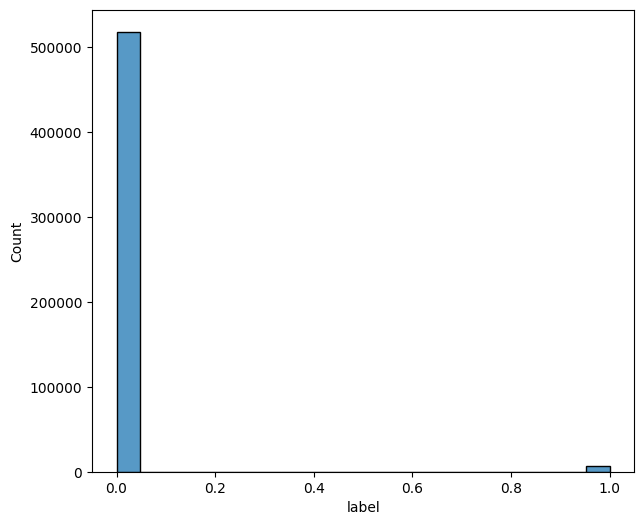

In [9]:
binary_ting=['num_links', 'num_unique_domains',
             'num_email_addresses', 'num_spelling_errors',
             'num_urgent_keywords', 'label']
for i in binary_ting:
    plt.figure(figsize=(7,6))
    cap_binary=df[i].clip(upper=100)
    sns.histplot(cap_binary)

In [10]:
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score

In [11]:
x=df.drop('label',axis=1)
y=df['label']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [14]:
models={
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'HistGradientBoostingClassifier':HistGradientBoostingClassifier()
}

for name ,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(f'Name of Classification {name}')
    print(f'Accuracy score : {accuracy *100 :.2f}')
    print(f'F1 score: {f1 *100 :.2f}')

Name of Classification DecisionTreeClassifier
Accuracy score : 98.57
F1 score: 40.79
Name of Classification RandomForestClassifier
Accuracy score : 98.97
F1 score: 41.64
Name of Classification GradientBoostingClassifier
Accuracy score : 98.71
F1 score: 8.62
Name of Classification HistGradientBoostingClassifier
Accuracy score : 98.73
F1 score: 17.60


In [15]:
for actual,predict in zip(y_test[:10],y_pred[:10]):
    print(f"Actual flag  : {actual}  |  precited    : {predict}" )

Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
Actual flag  : 0  |  precited    : 0
